# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [178]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [180]:
# Importing the file porter_data_1.csv
porter_data=pd.read_csv("C:\\Users\\Hardik\\Documents\\LinearRegression\\porter_data_1.csv")
porter_data.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [182]:
porter_data.shape

(175777, 14)

In [184]:
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [186]:
porter_data.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [189]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter_data['created_at'] = pd.to_datetime(porter_data['created_at'])
porter_data['actual_delivery_time'] = pd.to_datetime(porter_data['actual_delivery_time'])
porter_data.head()
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [191]:
# Convert categorical features to category type
porter_data['create_day']=porter_data.created_at.dt.day_name()
porter_data.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance create_day  
0                      21.0     34.44     Friday  
1                       2.0     27.60    Tuesday  
2                      18.0     11.56     Monday  
3                       8.0     31.80   Thursday  
4                       7.0      8.20    Tuesday

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [193]:
# Calculate time taken in minutes
#porter_data_new = porter_data.copy()
porter_data['time_diff'] = porter_data['actual_delivery_time'] - porter_data['created_at']
porter_data['time_diff_min'] = porter_data['time_diff'].dt.total_seconds() / 60
porter_data_dropped = porter_data.drop('time_diff',axis=1)
porter_data_dropped.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance create_day  time_diff_min  
0                      21.0     34.44     Friday           47.0  
1                       2.0     27.60    Tuesday           44.0  
2                      18.0     11.56     Monday           55.0  
3                       8.0     31.80   Thursday           59.0  
4                       7.0      8.20    Tuesday           46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [197]:
# Extract the hour and day of week from the 'created_at' timestamp
# Already done in above dataframe

# Create a categorical feature 'isWeekend'
porter_data_dropped['is_weekend'] = porter_data['created_at'].dt.dayofweek.isin([5, 6]).astype(int)
porter_data_dropped.head()
porter_data_dropped['hour']=porter_data_dropped['created_at'].dt.hour
porter_data_dropped['day']=porter_data_dropped['created_at'].dt.dayofweek
porter_data_dropped.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance create_day  time_diff_min  is_weekend  \
0                      21.0     34.44     Friday           47.0           0   
1                       2.0     27.60    Tuesday           44.0           0   
2                      18.0     11.56     Monday           55.0           0   
3                       8.0     31.80   Thursday           59.0           0   
4                       7.0      8.20    Tuesday           46.0           0   

   hour  day  
0    22    4  
1    21    1  
2     0    0  
3     3    3  
4     2    1

In [199]:
# Drop unnecessary columns
porter_data_new=porter_data_dropped.drop(['actual_delivery_time','created_at','create_day'],axis=1)
porter_data_new.head()

market_id  store_primary_category  order_protocol  total_items  subtotal  \
0        1.0                       4             1.0            4      3441   
1        2.0                      46             2.0            1      1900   
2        2.0                      36             3.0            4      4771   
3        1.0                      38             1.0            1      1525   
4        1.0                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_diff_min  \
0                14.0                      21.0     34.44           47.0   
1                 2.0                       2.0     27.60           44.0   
2                 6.0                      18.0     11.56           55.0   
3                 6.0                       8.0     31.80           59.0   
4                 5.0                       7.0      8.20           46.0   

   is_weekend  hour  day  
0           0    22    4  
1           0    21    1  
2           0     0    0  
3           0     3    3  
4           0     2    1

In [201]:
porter_data_new.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_diff_min', 'is_weekend',
       'hour', 'day'],
      dtype='object')

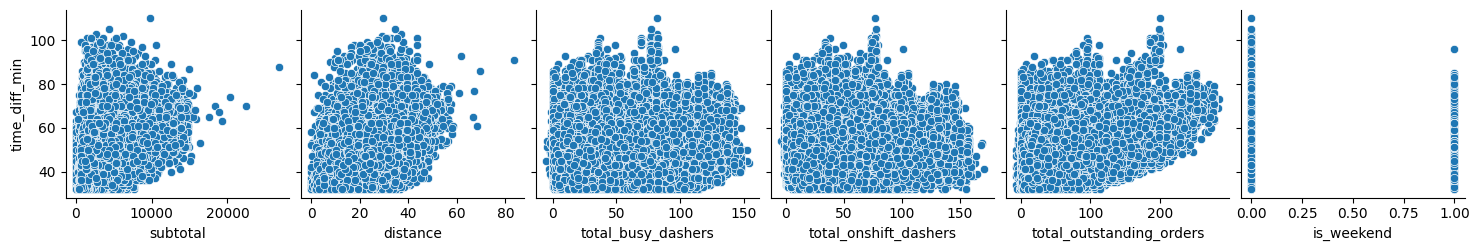

In [203]:
sns.pairplot(data=porter_data_new, x_vars=['subtotal','distance','total_busy_dashers','total_onshift_dashers','total_outstanding_orders','is_weekend'],y_vars='time_diff_min')
plt.show()

In [205]:
porter_data_new.isna().sum()
porter_data_new.store_primary_category.unique()

array([ 4, 46, 36, 38, 58, 68, 15, 57, 55, 20, 60, 13, 45, 39, 34, 18, 29,
       23, 50, 70,  6,  7, 10, 28, 24, 61, 59, 72, 16, 65, 47, 53, 49, 40,
       66, 42, 21, 14, 35, 11, 52,  2, 71, 25, 54, 69, 26, 12, 32, 30, 17,
       33, 22, 31,  0, 51, 48, 67, 44, 62,  9, 27, 19,  1,  5, 41, 37, 64,
       56, 63, 43,  8,  3], dtype=int64)

In [207]:
porter_data_new.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  time_diff_min     is_weekend           hour  \
count  175777.000000  175777.000000  175777.000000  175777.000000   
mean       21.843090      46.203013       0.345614       8.473441   
std         8.748712       9.327424       0.475569       8.676809   
min         0.000000      32.000000       0.000000       0.000000   
25%        15.360000      39.000000       0.000000       2.000000   
50%        21.760000      45.000000       0.000000       3.000000   
75%        28.120000      52.000000       1.000000      19.000000   
max        83.520000     110.000000       1.000000      23.000000   

                 day  
count  175777.000000  
mean        3.222293  
std         2.043874  
min         0.000000  
25%         1.000000  
50%         3.000000  
75%         5.000000  
max         6.000000

<Axes: >

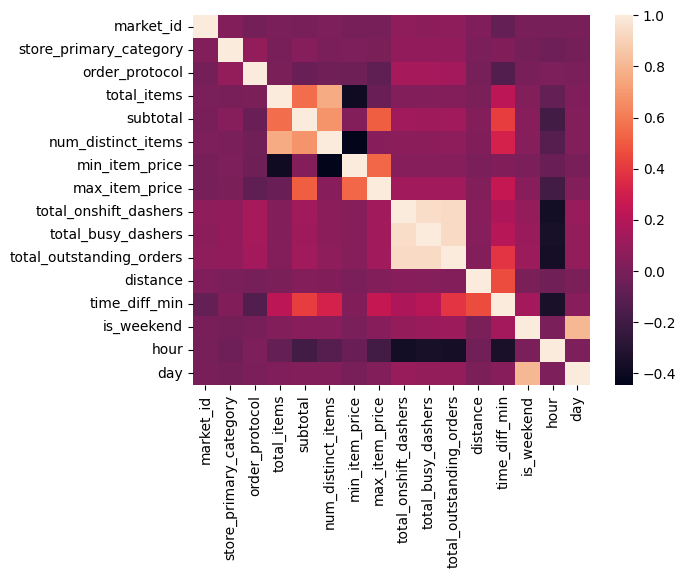

In [211]:
sns.heatmap(porter_data_new.corr())

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [213]:
# Define target variable (y) and features (X)
X=porter_data_new[['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'is_weekend',
       'hour', 'day']]
# Putting response variable to y
y = porter_data_new['time_diff_min']


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [227]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)
X_train = pd.get_dummies(X_train, columns=['market_id'],drop_first=True)
X_test = pd.get_dummies(X_test, columns=['market_id'],drop_first=True)
X_train[X_train.select_dtypes('bool').columns] = X_train.select_dtypes('bool').astype(int)
X_test[X_test.select_dtypes('bool').columns] = X_test.select_dtypes('bool').astype(int)
X_train.shape

(123043, 19)

In [225]:
X_test.shape

(52734, 19)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [241]:
# Define numerical and .categorical columns for easy EDA and data manipulation
#column_number=['total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_dashers','total_outstanding_orders','distance','time_diff_min','hour','day','is_weekend']
column_number=['total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_dashers','total_outstanding_orders','distance','is_weekend']
column_category=['market_id_2.0','market_id_3.0','market_id_4.0','market_id_5.0','market_id_6.0','store_primary_category','order_protocol']
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123043 entries, 94746 to 38408
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   store_primary_category    123043 non-null  int64  
 1   order_protocol            123043 non-null  float64
 2   total_items               123043 non-null  int64  
 3   subtotal                  123043 non-null  int64  
 4   num_distinct_items        123043 non-null  int64  
 5   min_item_price            123043 non-null  int64  
 6   max_item_price            123043 non-null  int64  
 7   total_onshift_dashers     123043 non-null  float64
 8   total_busy_dashers        123043 non-null  float64
 9   total_outstanding_orders  123043 non-null  float64
 10  distance                  123043 non-null  float64
 11  is_weekend                123043 non-null  int32  
 12  hour                      123043 non-null  int32  
 13  day                       123043 non-null  int

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

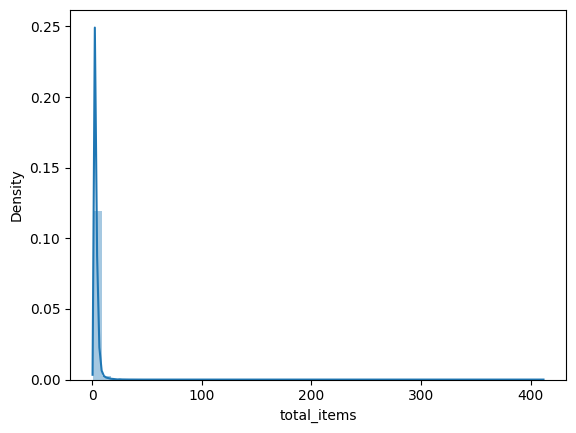

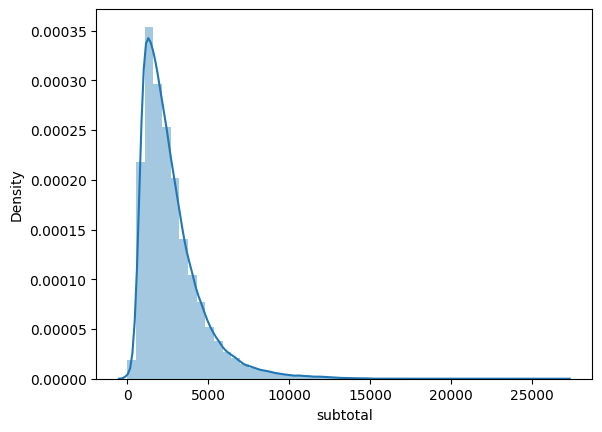

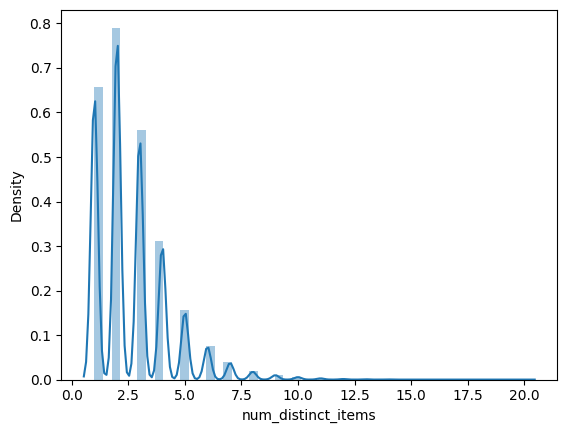

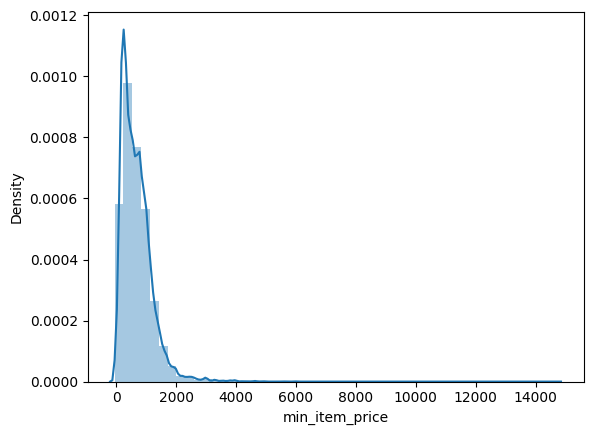

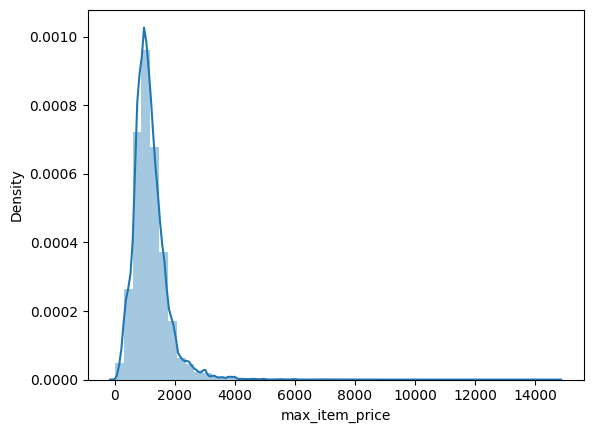

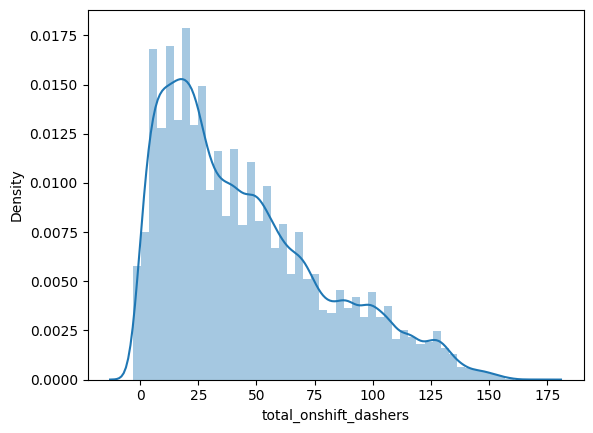

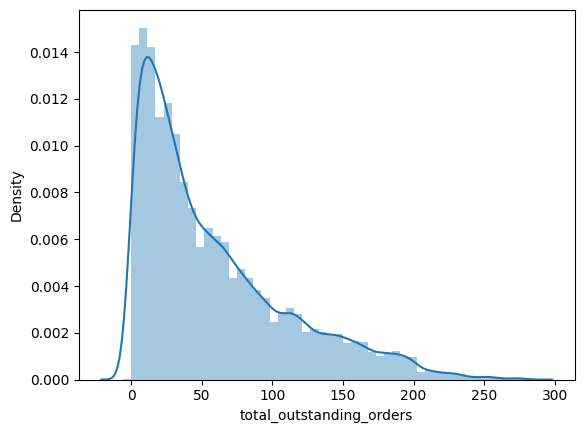

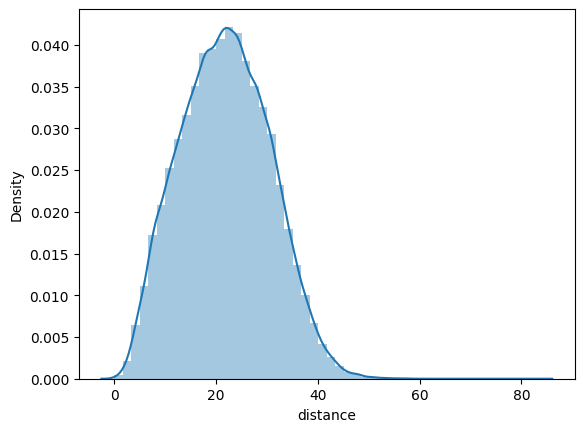

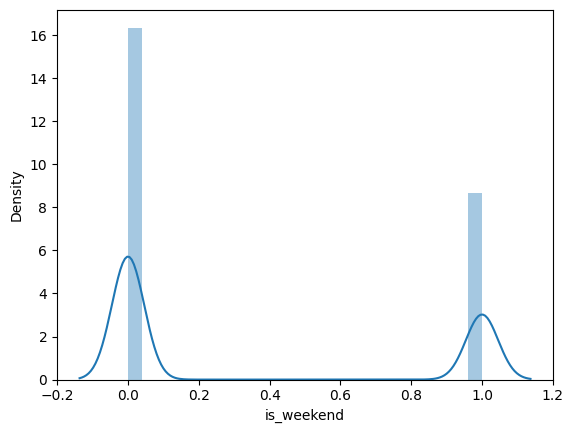

In [237]:
# Plot distributions for all numerical columns
for column in column_number:
    sns.distplot(X_train[column])
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

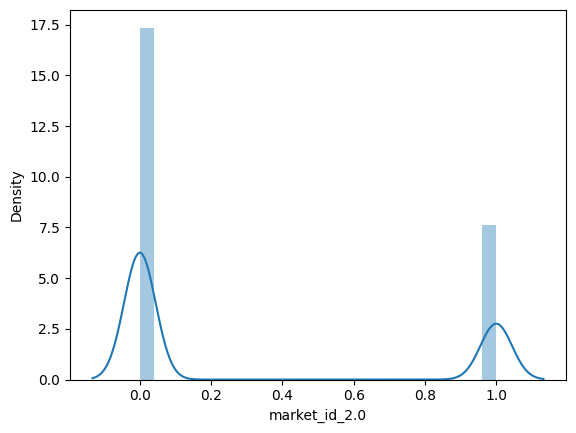

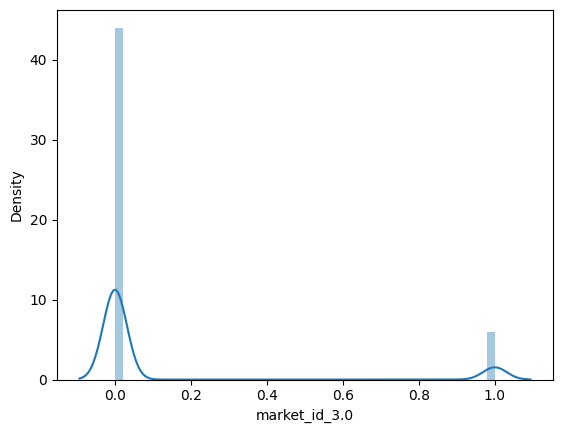

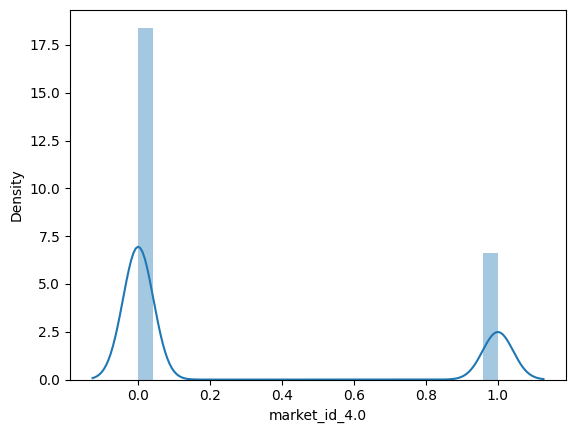

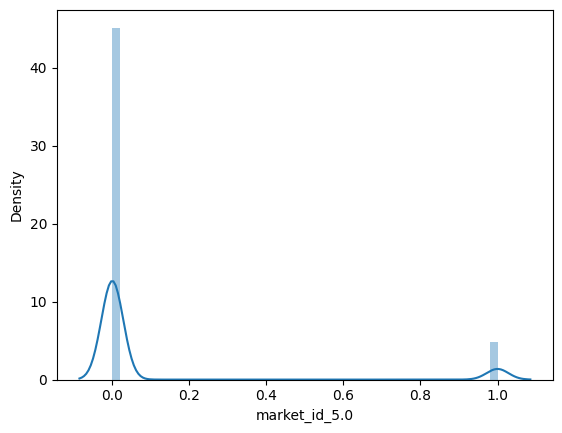

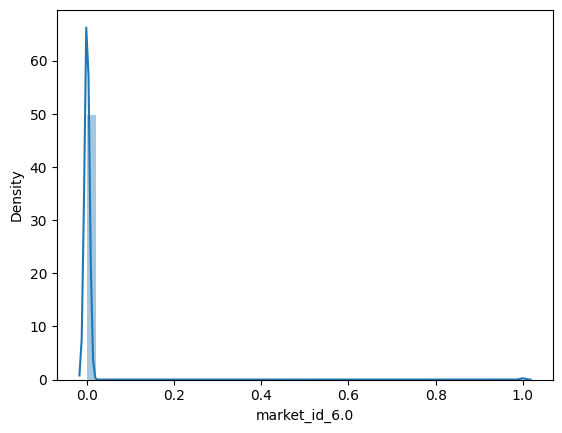

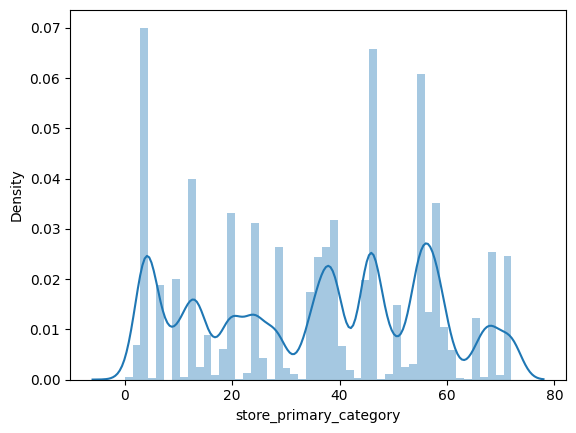

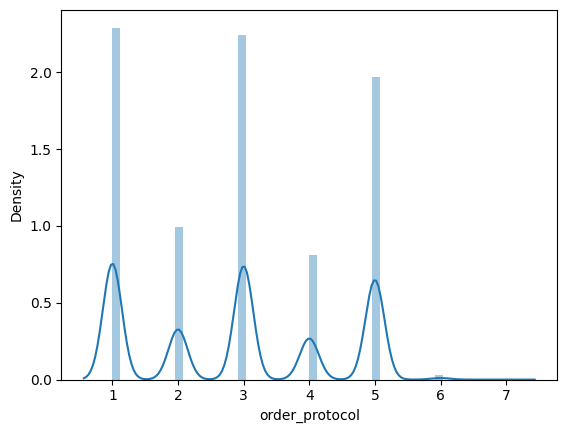

In [243]:
# Distribution of categorical columns
for column in column_category:
    sns.distplot(X_train[column])
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

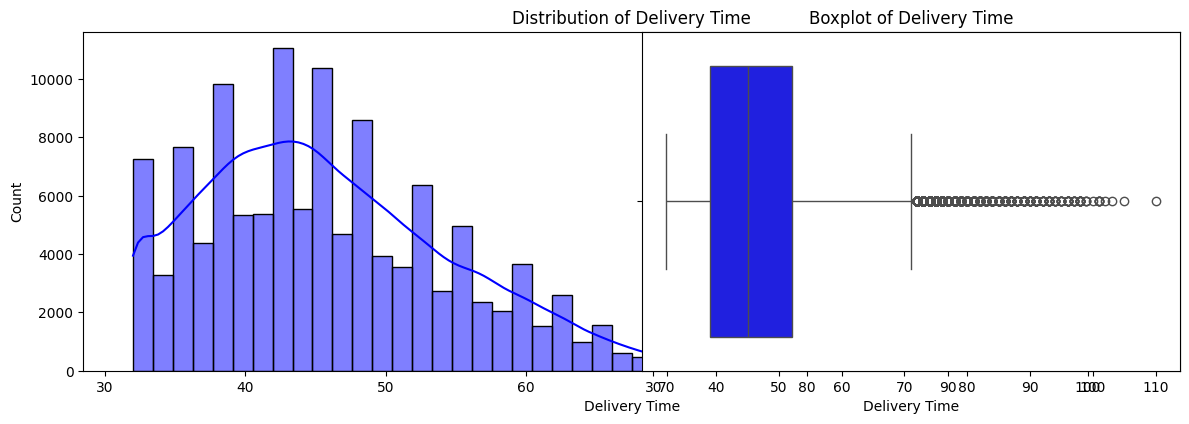

In [245]:
# Distribution of time_taken

plt.figure(figsize=(12, 5))
sns.histplot(y_train, bins=50, kde=True, color="blue")
plt.xlabel("Delivery Time")
plt.ylabel("Count")
plt.title("Distribution of Delivery Time")
# Box plot to check any outlier
plt.subplot(1, 2, 2)
sns.boxplot(x=y, color="blue")
plt.xlabel("Delivery Time")
plt.title("Boxplot of Delivery Time")

plt.tight_layout()
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

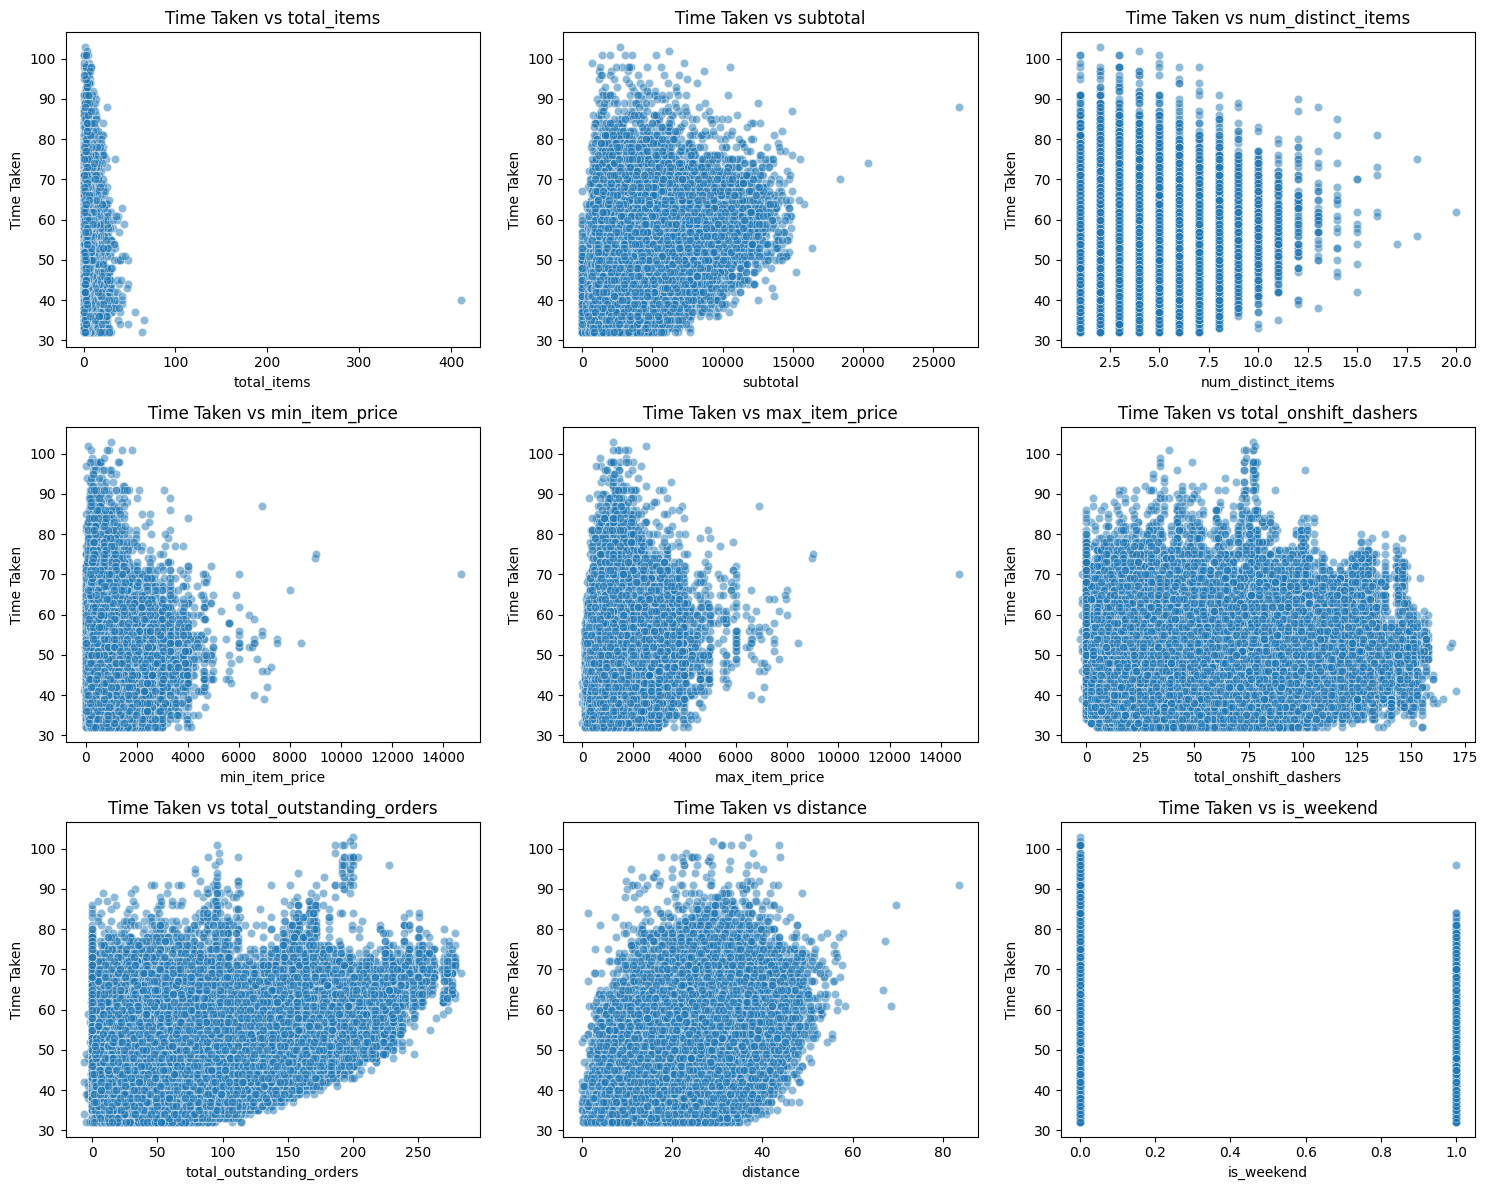

In [247]:
# Scatter plot to visualise the relationship between time_taken and other features
import math
# Loop through each numerical feature and create scatter plots
num_features = len(column_number)
num_cols = 3  # Set number of columns
num_rows = math.ceil(num_features / num_cols)  # Calculate required rows

plt.figure(figsize=(num_cols * 5, num_rows * 4))

for i, col in enumerate(column_number, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Time Taken")
    plt.title(f"Time Taken vs {col}")

plt.tight_layout()
plt.show()


7
3
3


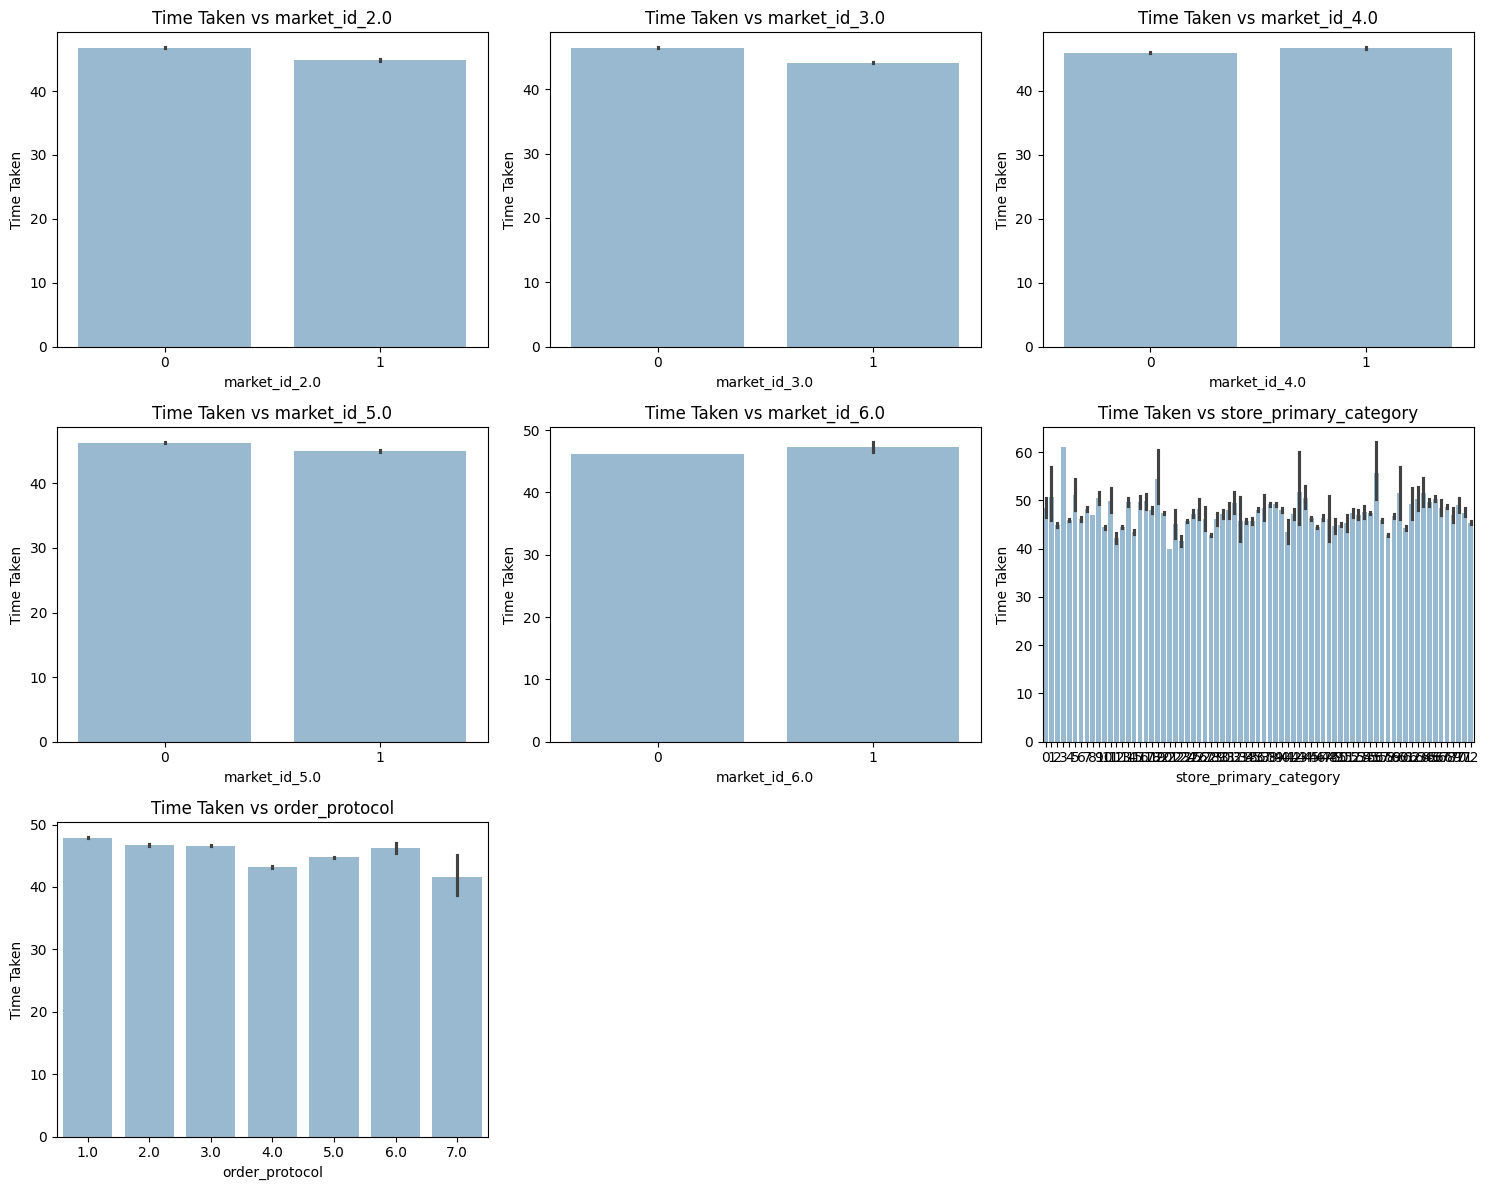

In [249]:
## show distribution of categorical columns
num_features = len(column_category)
num_cols = 3  # Set number of columns
num_rows = math.ceil(num_features / num_cols)  # Calculate required rows
print(num_features)
print(num_cols)
print(num_rows)

plt.figure(figsize=(num_cols * 5, num_rows * 4))

for i, col in enumerate(column_category, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.barplot(x=X_train[col], y=y_train, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Time Taken")
    plt.title(f"Time Taken vs {col}")

plt.tight_layout()
plt.show()


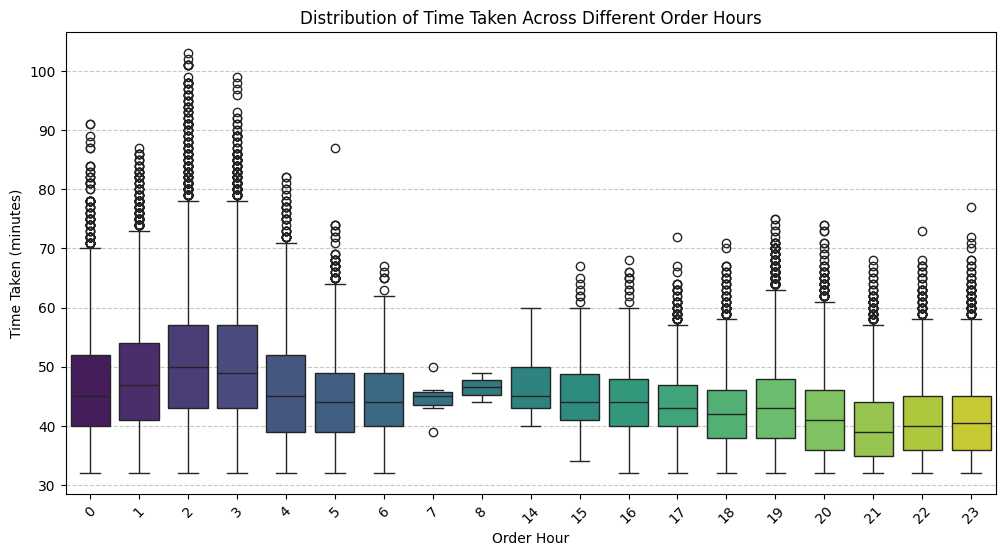

In [251]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train["hour"], y=y_train, palette="viridis")
plt.xlabel("Order Hour")
plt.ylabel("Time Taken (minutes)")
plt.title("Distribution of Time Taken Across Different Order Hours")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

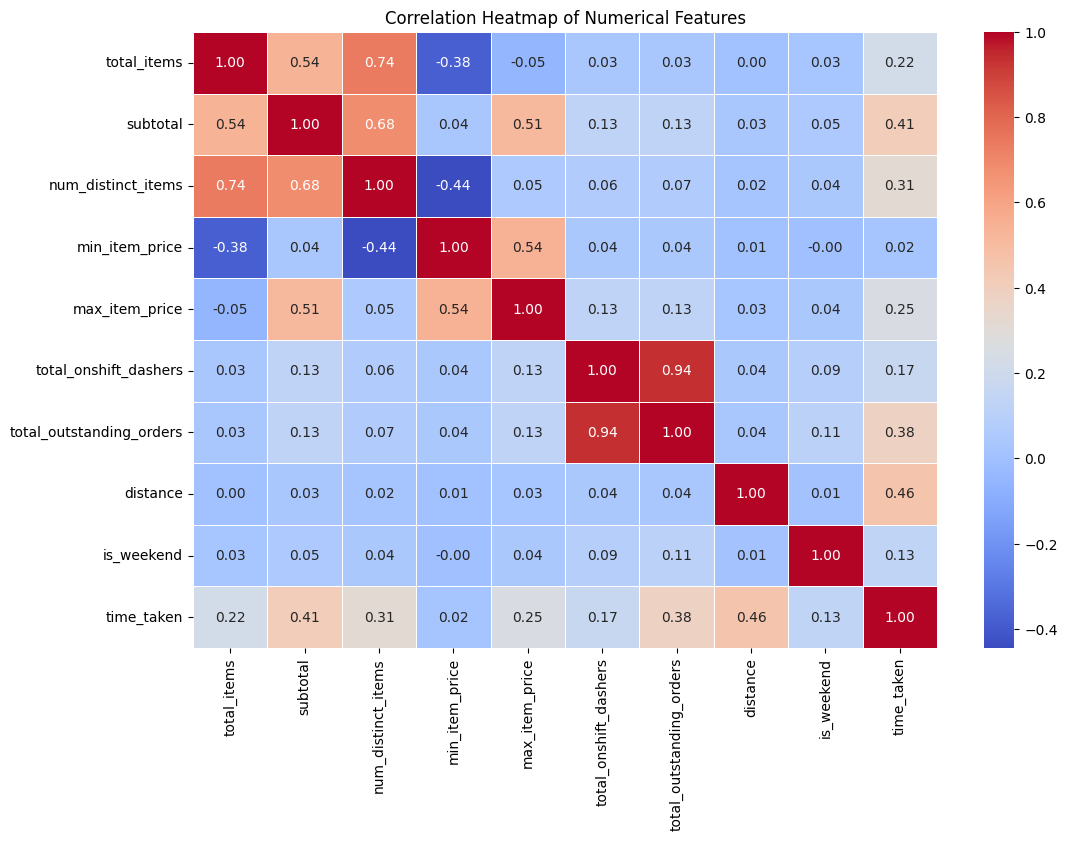

In [253]:
# Plot the heatmap of the correlation matrix
X_train_numeric = X_train[column_number].copy()
X_train_numeric["time_taken"] = y_train 
corr_matrix = X_train_numeric.corr()
# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [255]:
# Drop 3-5 weakly correlated columns from training dataset

weak_columns = ["min_item_price", "max_item_price", "total_onshift_dashers", "is_weekend"]
# Drop these columns from X_train and X_test
X_train = X_train.drop(columns=weak_columns,axis=1)
X_test = X_test.drop(columns=weak_columns,axis=1)
X_train.head()

store_primary_category  order_protocol  total_items  subtotal  \
94746                       24             5.0            2      1790   
173338                      72             5.0            1       845   
37592                       55             5.0            1      1900   
42763                       28             4.0            6       463   
27506                       72             1.0            3      3500   

        num_distinct_items  total_busy_dashers  total_outstanding_orders  \
94746                    2                 9.0                      15.0   
173338                   1                76.0                     136.0   
37592                    1                21.0                      28.0   
42763                    3                87.0                     129.0   
27506                    3                13.0                      17.0   

        distance  hour  day  market_id_2.0  market_id_3.0  market_id_4.0  \
94746      18.04    18    0              0              0              1   
173338     24.28     2    5              0              0              1   
37592      28.24    23    6              0              0              1   
42763      13.88     1    5              1              0              0   
27506       8.00     5    5              1              0              0   

        market_id_5.0  market_id_6.0  
94746               0              0  
173338              0              0  
37592               0              0  
42763               0              0  
27506               0              0

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

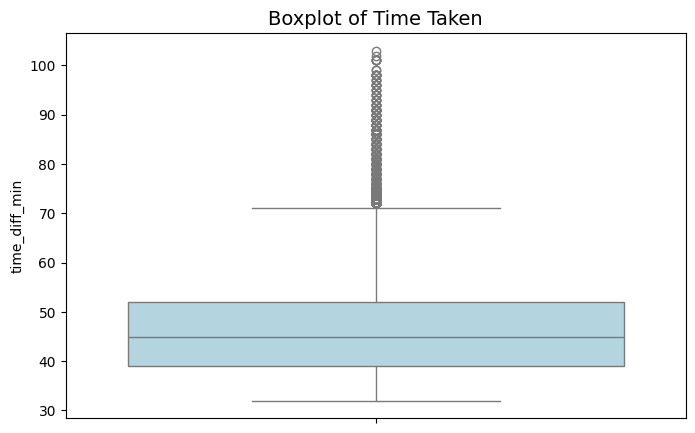

In [257]:
# Boxplot for time_taken
# Set figure size
plt.figure(figsize=(8, 5))
sns.boxplot(y=y_train, color="lightblue")
plt.title("Boxplot of Time Taken", fontsize=14)
plt.show()


In [259]:
y_train.head()

94746     41.0
173338    41.0
37592     44.0
42763     40.0
27506     44.0
Name: time_diff_min, dtype: float64

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [261]:
# Handle outliers
import numpy as np


def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile Range

        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()
#numerical_cols = ['total_items','subtotal','num_distinct_items','total_outstanding_orders','distance','time_diff_min','hour','day']
#numerical_cols
X_train_cleaned = remove_outliers_iqr(X_train, numerical_cols)
y_train_cleaned = y_train.loc[X_train_cleaned.index]  

print(f"Original Shape: {X_train.shape}, New Shape: {X_train_cleaned.shape}")



Original Shape: (123043, 15), New Shape: (83558, 15)


In [265]:
X_train_cleaned.head()

store_primary_category  order_protocol  total_items  subtotal  \
94746                       24             5.0            2      1790   
173338                      72             5.0            1       845   
37592                       55             5.0            1      1900   
42763                       28             4.0            6       463   
27506                       72             1.0            3      3500   

        num_distinct_items  total_busy_dashers  total_outstanding_orders  \
94746                    2                 9.0                      15.0   
173338                   1                76.0                     136.0   
37592                    1                21.0                      28.0   
42763                    3                87.0                     129.0   
27506                    3                13.0                      17.0   

        distance  hour  day  market_id_2.0  market_id_3.0  market_id_4.0  \
94746      18.04    18    0              0              0              1   
173338     24.28     2    5              0              0              1   
37592      28.24    23    6              0              0              1   
42763      13.88     1    5              1              0              0   
27506       8.00     5    5              1              0              0   

        market_id_5.0  market_id_6.0  
94746               0              0  
173338              0              0  
37592               0              0  
42763               0              0  
27506               0              0

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [271]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [273]:
# Apply scaling to the numerical columns
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_cleaned)

X_test_scaled = scaler.transform(X_test)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [275]:
# Create/Initialise the model
X_train_const = sm.add_constant(X_train_scaled)
X_test_const = sm.add_constant(X_test_scaled)

sm_model = sm.OLS(y_train_cleaned, X_train_const).fit()

print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:          time_diff_min   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                 1.817e+04
Date:                Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:13:26   Log-Likelihood:            -2.4838e+05
No. Observations:               83558   AIC:                         4.968e+05
Df Residuals:                   83545   BIC:                         4.969e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3243      0.016   2770.603      0.0

In [277]:
# Train the model using the training data
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_cleaned)

print("Model training complete!")


Model training complete!


In [289]:
# Make predictions

print("X_train_cleaned shape:", X_train_cleaned.shape)
print("X_test shape:", X_test.shape)
X_test.head()



X_train_cleaned shape: (83558, 15)
X_test shape: (52734, 15)


store_primary_category  order_protocol  total_items  subtotal  \
139667                      45             1.0            3      1295   
80077                        4             1.0            2      2950   
41872                       46             4.0            1      1395   
165269                      24             5.0            2      2967   
151215                       6             2.0            3      1250   

        num_distinct_items  total_busy_dashers  total_outstanding_orders  \
139667                   2                59.0                      61.0   
80077                    1                17.0                      16.0   
41872                    1                27.0                      45.0   
165269                   2               127.0                     200.0   
151215                   2                30.0                      33.0   

        distance  hour  day  market_id_2.0  market_id_3.0  market_id_4.0  \
139667     20.56     3    4              0              0              0   
80077      12.84     1    5              0              0              0   
41872      16.80     3    3              0              0              0   
165269     19.00     3    5              0              0              1   
151215     26.72    22    5              0              0              1   

        market_id_5.0  market_id_6.0  
139667              0              0  
80077               0              0  
41872               0              0  
165269              0              0  
151215              0              0

In [295]:
#Apply scaler on X_test
X_test_scaled = scaler.transform(X_test)
X_test_const = sm.add_constant(X_test_scaled)

print("X_test_const shape:", X_test_const.shape)

X_test_const shape: (52734, 16)


In [297]:
X_test_const = sm.add_constant(X_test_scaled, has_constant="add")

print("X_test_const shape:", X_test_const.shape)  

# Now, make predictions
y_pred_sm = sm_model.predict(X_test_const)

print("Predictions complete!")

X_test_const shape: (52734, 16)
Predictions complete!


In [299]:
# Find results for evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, y_pred_sm)
mse = mean_squared_error(y_test, y_pred_sm)
rmse = mean_squared_error(y_test, y_pred_sm, squared=False)
r2 = r2_score(y_test, y_pred_sm)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 3.88
Mean Squared Error (MSE): 25.14
Root Mean Squared Error (RMSE): 5.01
R-squared (R²): 0.7104


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [301]:
# Loop through the number of features and test the model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

num_features_list = []
rmse_list = []
max_features = 10
rfe = RFE(LinearRegression(), n_features_to_select=max_features, step=2) 
rfe.fit(X_train_scaled, y_train_cleaned)
X_train_rfe = X_train_scaled[:, rfe.support_]
X_test_rfe = X_test_scaled[:, rfe.support_]


lr_model = LinearRegression()
lr_model.fit(X_train_rfe, y_train_cleaned)

# Make predictions
y_pred_rfe = lr_model.predict(X_test_rfe)


rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfe))

print(f"Selected Features: {max_features}, RMSE: {rmse:.4f}")

selected_features = X_train.columns[rfe.support_]
print("\nFinal Selected Features:", list(selected_features))




Selected Features: 10, RMSE: 5.0133

Final Selected Features: ['order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour', 'market_id_2.0', 'market_id_4.0']


In [303]:
# Build the final model with selected number of features
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

best_num_features = 8
rfe = RFE(LinearRegression(), n_features_to_select=best_num_features)
rfe.fit(X_train_scaled, y_train_cleaned)

selected_features = X_train.columns[rfe.support_]
print("\nFinal Selected Features:", list(selected_features))

X_train_final = X_train_scaled[:, rfe.support_]
X_test_final = X_test_scaled[:, rfe.support_]

# Train the final model
final_model = LinearRegression()
final_model.fit(X_train_final, y_train_cleaned)
# Make predictions
y_pred_final = final_model.predict(X_test_final)

print("Final model trained successfully with 8 selected features!")




Final Selected Features: ['order_protocol', 'subtotal', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour', 'market_id_2.0', 'market_id_4.0']
Final model trained successfully with 8 selected features!


In [305]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute evaluation metrics
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test, y_pred_final)

# Print final results
print(f"\nFinal Model Metrics with {best_num_features} Selected Features:")
print(f"Mean Absolute Error (MAE): {mae_final:.2f}")
print(f"Mean Squared Error (MSE): {mse_final:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final:.2f}")
print(f"R-squared (R²): {r2_final:.4f}")


Final Model Metrics with 8 Selected Features:
Mean Absolute Error (MAE): 3.89
Mean Squared Error (MSE): 25.30
Root Mean Squared Error (RMSE): 5.03
R-squared (R²): 0.7085


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

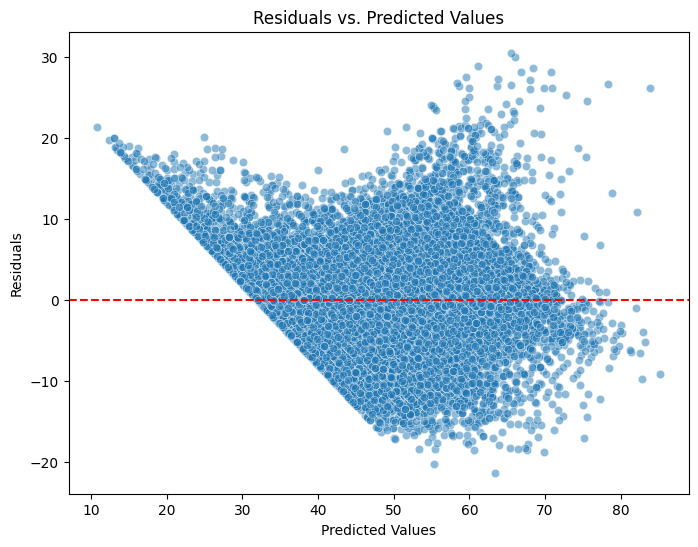

In [307]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Compute residuals
residuals = y_test - y_pred_final
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_final, y=residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")  
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [309]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>


1. Market_ids      :  Some Area takes longer time to deliver because of stuck traffic, how many restaurants are presnt
2. Order_protocols :  Orders can slow down things. Some ways of placing orders might take longer because of how the system handles them, maybe assigning drivers differently or adding extra steps.

##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

test_size = 0.2 means that 20% of the whole dataset is used for testing, while 80% is used for training model.This ensures the model is trained on most of the data but still has unseen data to evaluate its performance.

##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

Distance has highest correlation with target variable. And it is logical as longer distance takes longer time to deliver.



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

Boxplot, histograms and z-score method are used to understand outliers

##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

Distance,sub_totals and total_outstanding_orders

#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


Linear regression is a type of supervised machine-learning algorithm that learns from the labelled datasets and maps the data points with most optimized linear functions which can be used for prediction on new datasets. It assumes that there is a linear relationship between the input and output, meaning the output changes at a constant rate as the input changes. This relationship is represented by a straight line.

For example we want to predict a student's exam score based on how many hours they studied. We observe that as students study more hours, their scores go up. In the example of predicting exam scores based on hours studied. Here



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

Single linear regression has one feature.
Multiple linear regression has more than one feature, but feature list should not be too long as well



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


The cost function measures the error between predicted and actual values. In Linear Regression, we use MSE The algorithm uses Gradient Descent to adjust coefficients and minimize the cost function.

##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

Overfitting happens when a model learns too much from the training data, including details that don’t matter (like noise or outliers).
Underfitting is the opposite of overfitting. It happens when a model is too simple to capture what’s going on in the data


##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots are essential tools for evaluating the assumptions and performance of a linear regression model. They visually represent the differences between the actual values and the predicted values (residuals) and help identify patterns or anomalies that may indicate issues with the model.

Residual plots are created by plotting the predicted values on the x-axis and the residuals on the y-axis. Ideally, the residuals should be symmetrically distributed around zero, with no discernible patterns. This indicates that the model captures the relationship between the predictors and the outcome variable effectively.